C:\Users\anish\AppData\Local\Temp\ipykernel_768\2434424162.py:99: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = sample_data.groupby(


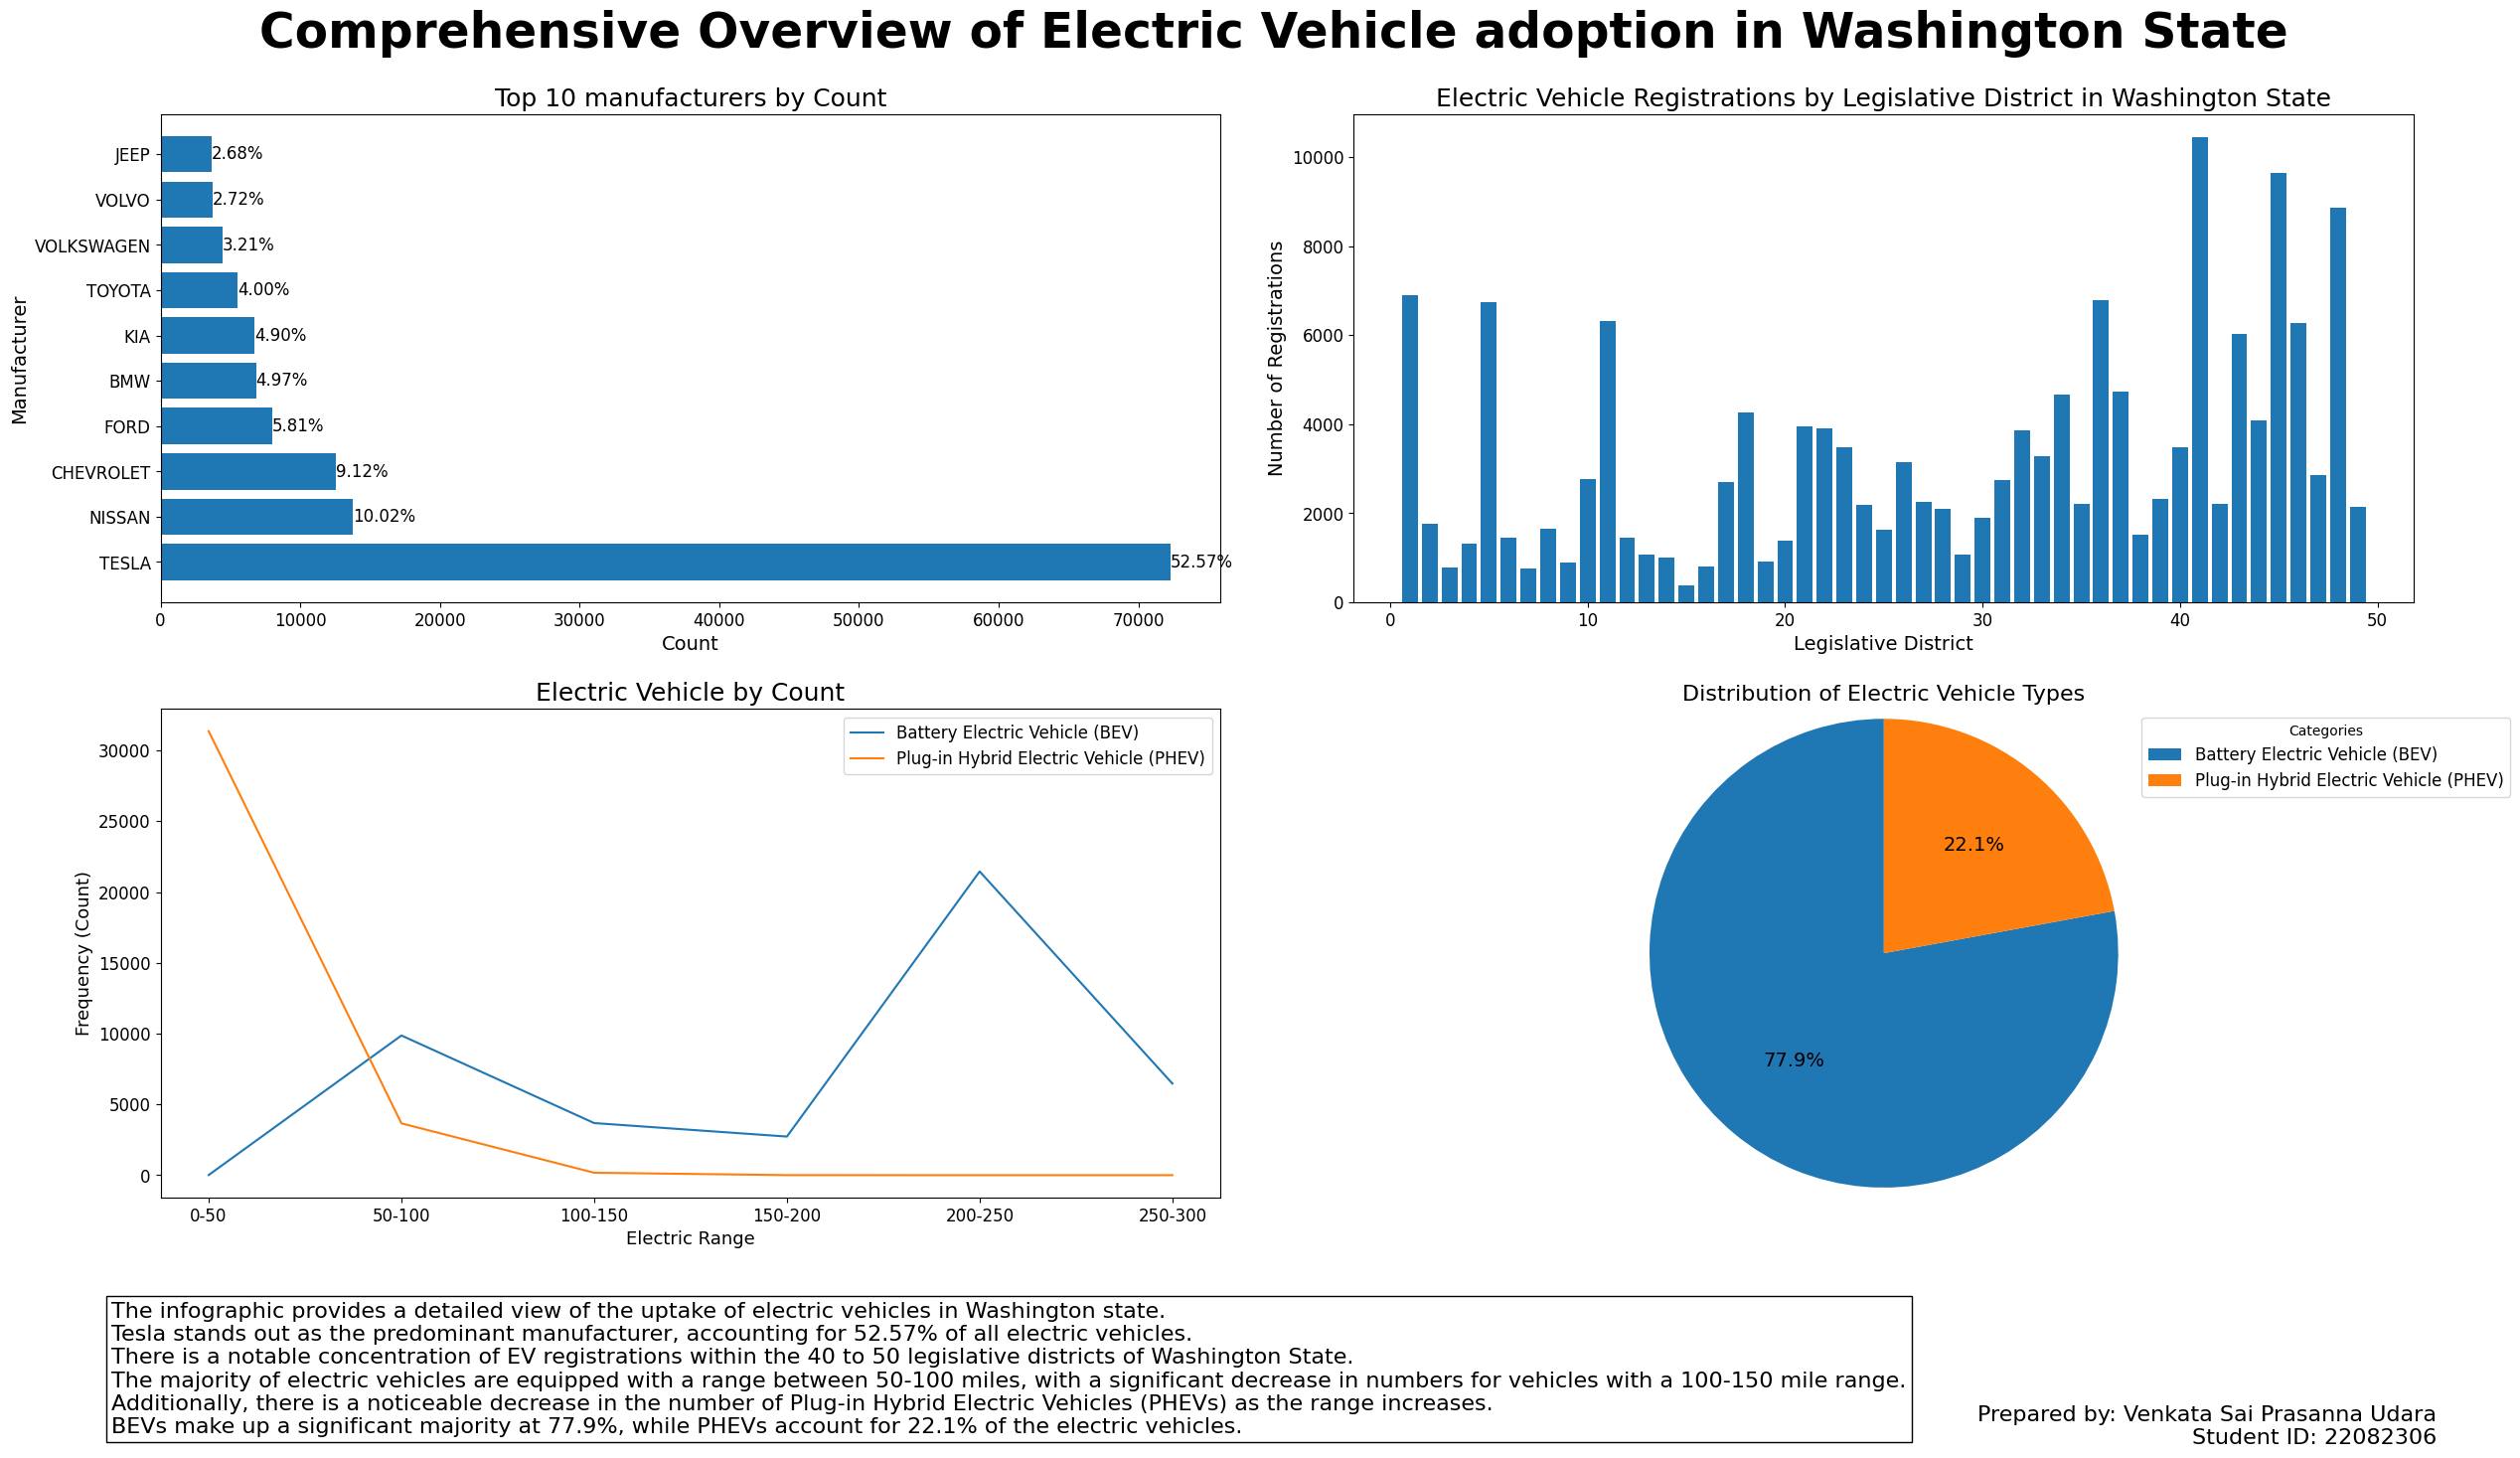

In [23]:
# -*- coding: utf-8 -*-
"""
Created on Thu Jan  28 22:56:32 2023

@author: prasanna_udara
"""
# Import library packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


def read_data(filename):
    '''
    Function to read the dataframe "filename" and return an array with sample
    of salaries.
    '''
    # Read the data from file
    data = pd.read_csv(filename)

    # Drop NA values
    data.dropna(inplace=True)
    return data


def infograph(data):
    '''
    Function defined to display infographics visualisation for the given
    dataset and give out some insights from the visualisation.
    '''
    # Define the subplot for plotting 4 graphs
    fig, ax = plt.subplots(2, 2, figsize=(26, 13))

    # Plotting on the first subplot (ax1)
    ax1 = plt.subplot(2, 2, 1)

    # Get the Data
    top_makes = data['Make'].value_counts().sort_values(
        ascending=False).nlargest(10)

    # Calculate the percentages
    percentages = (top_makes / top_makes.sum()) * 100

    # Create a barh plot
    bars = ax1.barh(top_makes.index, top_makes)

    # Add percentage labels on top of each bar
    for bar, percentage in zip(bars, percentages):
        plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2,
                 f'{percentage:.2f}%', ha='left', va='center', fontsize=12)

    # Add titles, labels and graph ticks
    ax1.set_title('Top 10 manufacturers by Count', fontsize=18)
    ax1.set_xlabel('Count', fontsize=14)
    ax1.set_ylabel('Manufacturer', fontsize=14)
    ax1.tick_params(axis='x', labelsize=12)
    ax1.tick_params(axis='y', labelsize=12)

    # Plotting on the second subplot (ax2)
    ax2 = plt.subplot(2, 2, 2)

    # Group by Legislative District
    district_distribution = data.groupby(
        'Legislative District').size().reset_index(name='Registrations')

    # Sort by Registrations
    popular_districts = district_distribution.sort_values(
        by='Registrations', ascending=False)

    # Plot a bar chart
    ax2.bar(popular_districts['Legislative District'],
            popular_districts['Registrations'])

    # Add titles, labels and graph ticks
    ax2.set_title(
        'Electric Vehicle Registrations by Legislative District in Washington '
        'State', fontsize=18)
    ax2.set_xlabel('Legislative District', fontsize=14)
    ax2.set_ylabel('Number of Registrations', fontsize=14)
    ax2.tick_params(axis='x', labelsize=12)
    ax2.tick_params(axis='y', labelsize=12)

    # Plotting on the third subplot (ax3)
    ax3 = plt.subplot(2, 2, 3)

    # Get the required data from dataframe
    sample_data = data[["Electric Range", "Electric Vehicle Type"]]

    # Remove unrequired data
    sample_data = sample_data.replace(0, pd.NA).dropna().reset_index()

    # Set the range values for bins
    bins = np.arange(0, 301, 50)
    bin_labels = [f"{bins[i]}-{bins[i+1]}" for i in range(len(bins)-1)]

    # Group the data using the bin range
    sample_data['Range Bin'] = pd.cut(
        sample_data['Electric Range'], bins, labels=bin_labels)
    grouped_data = sample_data.groupby(
        ['Range Bin', 'Electric Vehicle Type']).size().unstack(fill_value=0)

    # Plot a bar chart
    grouped_data.plot(kind='line', ax=ax3)

    # Add titles, labels and graph ticks
    ax3.set_title('Electric Vehicle by Count', fontsize=18)
    ax3.set_xlabel('Electric Range', fontsize=13)
    ax3.set_ylabel('Frequency (Count)', fontsize=13)
    ax3.tick_params(axis='x', labelsize=12)
    ax3.tick_params(axis='y', labelsize=12)

    # Add legend
    ax3.legend(fontsize=12)

    # Plotting on the second subplot (ax4)
    ax4 = plt.subplot(2, 2, 4)

    # Get the Data
    EV_type = data['Electric Vehicle Type'].value_counts()

    # Plot a pie chart
    patches, texts, autotexts = plt.pie(EV_type, labels=['']*len(EV_type),
                                        autopct='%1.1f%%', startangle=90,
                                        radius=1.2, textprops={'fontsize': 14})
    # Add title and legend
    ax4.set_title('Distribution of Electric Vehicle Types', fontsize=16)
    ax4.legend(patches, EV_type.index, title="Categories",
               loc="upper right", bbox_to_anchor=(1.8, 1), fontsize=12)

    # Define and add the title to the figure
    title_text = "Comprehensive Overview of Electric Vehicle adoption in " \
        "Washington State"
    plt.suptitle(title_text, fontsize=35, fontweight='bold', ha='center')

    # Define and add the insights to the figure
    insights_text = (
        "The infographic provides a detailed view of the uptake of electric "
        "vehicles in Washington state.\n"
        "Tesla stands out as the predominant manufacturer, accounting for "
        "52.57% of all electric vehicles.\n"
        "There is a notable concentration of EV registrations within the 40 "
        "to 50 legislative districts of Washington State.\n"
        "The majority of electric vehicles are equipped with a range between "
        "50-100 miles, with a significant decrease in numbers for vehicles "
        "with a 100-150 mile range.\n"
        "Additionally, there is a noticeable decrease in the number of Plug-in"
        " Hybrid Electric Vehicles (PHEVs) as the range increases.\n"
        "BEVs make up a significant majority at 77.9%, while PHEVs account for"
        " 22.1% of the electric vehicles.")
    plt.figtext(0.05, -0.02, insights_text, ha='left',
                va='top', fontsize=16, wrap=True,
                bbox=dict(edgecolor='black', facecolor='white'))

    # Add name and ID number at the bottom right corner
    name_id_text = ("Prepared by: Venkata Sai Prasanna Udara\n"
                    "Student ID: 22082306")
    plt.figtext(0.95, -0.1, name_id_text, ha='right', va='top', fontsize=16)

    # Adjust the layout
    plt.tight_layout(pad=2.0)

    # Save the figure
    # plt.savefig('22082306.png', dpi=300, bbox_inches='tight', pad_inches=0.5)

    # Display the figure
    plt.show()


def main():
    # Calling read_data function with filename
    data = read_data("Electric_Vehicle_Population_Data.csv")

    # Calling infograph function
    infograph(data)


if __name__ == "__main__":
    # Calling main program
    main()
